# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt
# TODO: Fill this in based on where you saved the training and testing data

training_file = "/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/train.p"
validation_file="/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/valid.p"
testing_file = "/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

    
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 3)


In [2]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(np.max(y_train))
print(np.min(y_train))

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)
42
0


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Text(0.5, 1.0, 'Test data distribution')

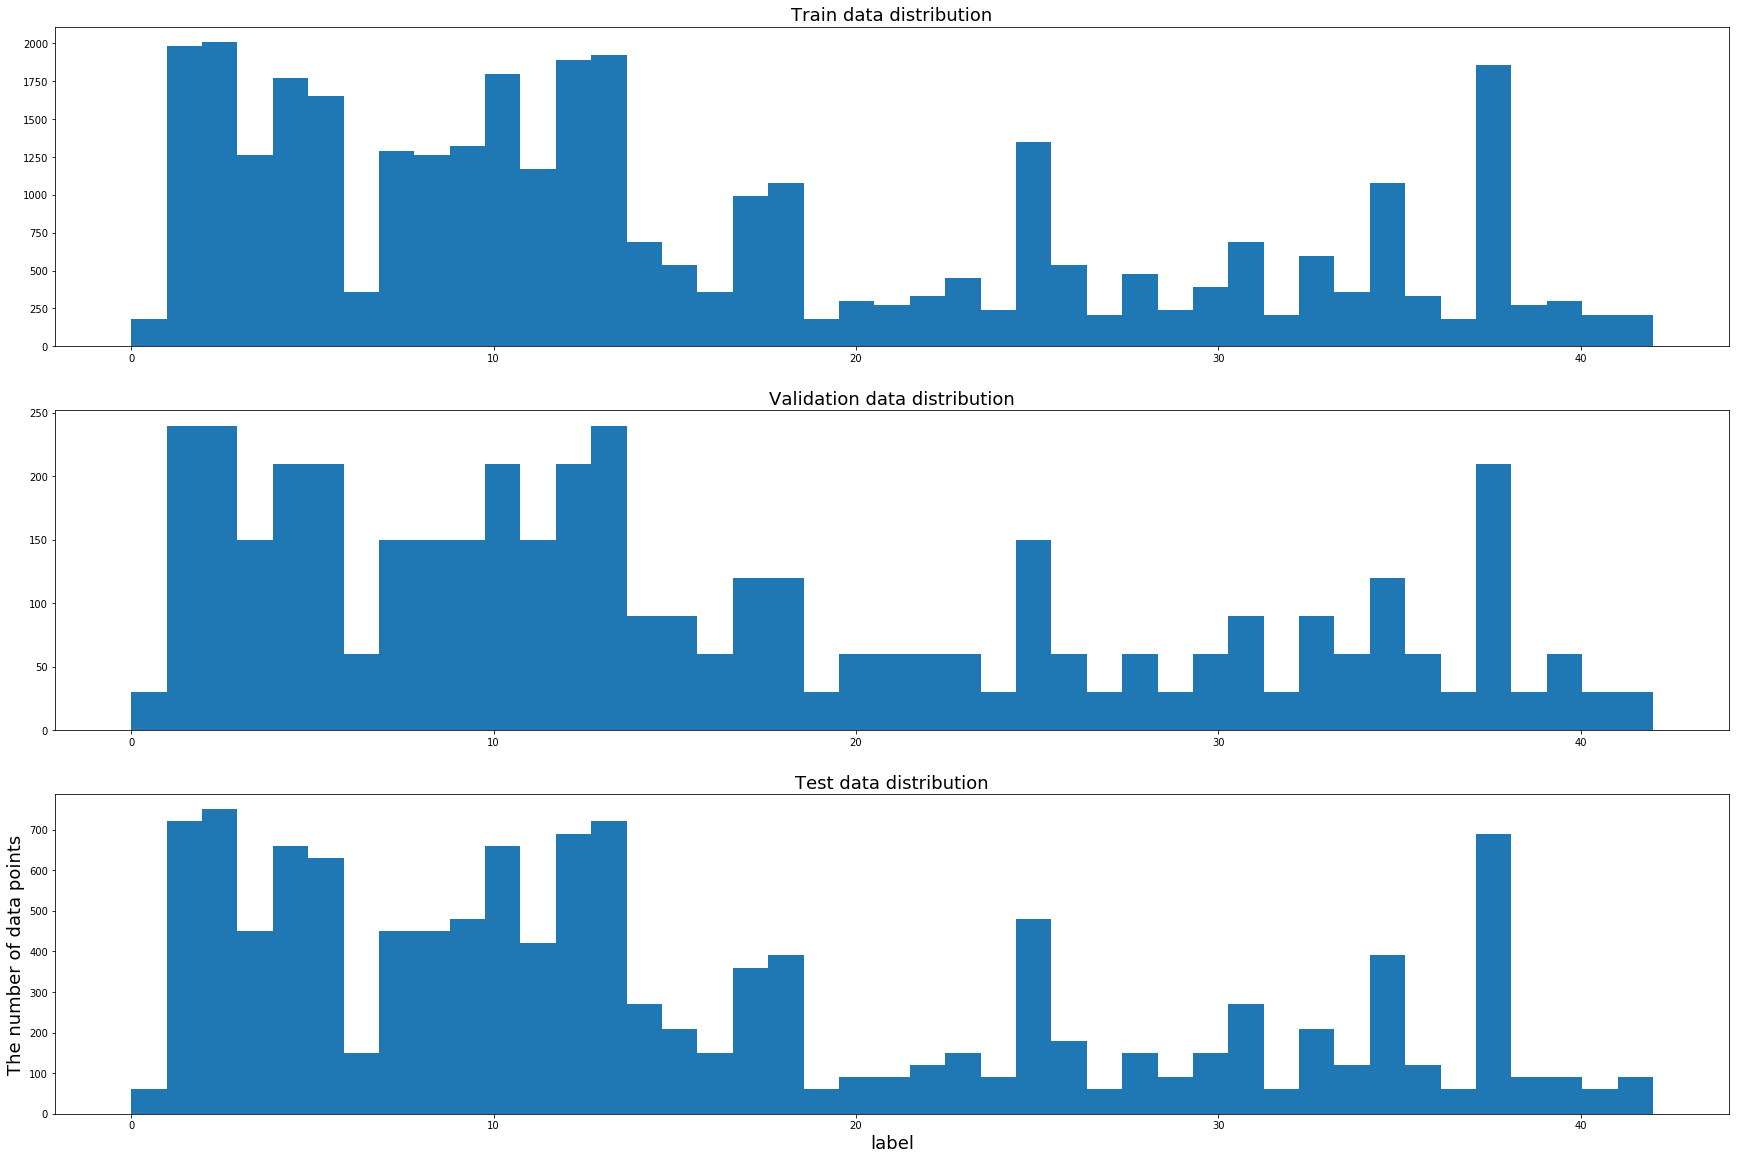

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = (32,32)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

f,axes = plt.subplots(nrows=3, ncols=1,figsize=(30,20))
axes[0].hist(y_train, bins=n_classes)
axes[0].set_title("Train data distribution",fontsize=18)
plt.xlabel('label',fontsize=18)
plt.ylabel('The number of data points',fontsize=18)
axes[1].hist(y_valid, bins=n_classes)
axes[1].set_title("Validation data distribution",fontsize=18)
axes[2].hist(y_test, bins=n_classes)
axes[2].set_title("Test data distribution",fontsize=18)


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

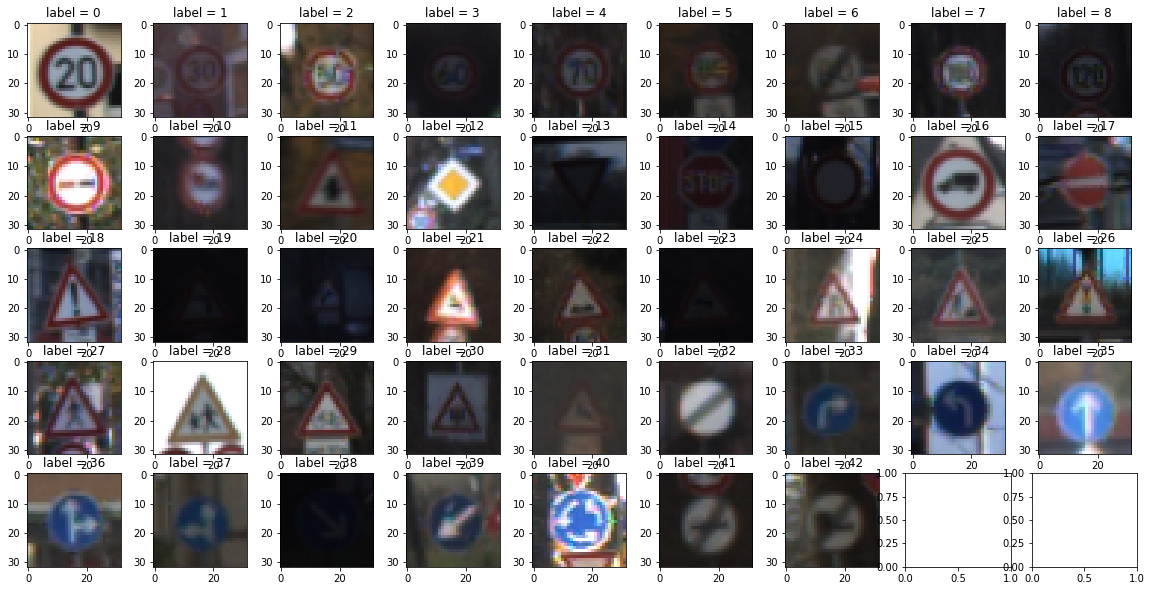

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
from PIL import Image
# Visualizations will be shown in the notebook.
%matplotlib inline


fig, axes = plt.subplots(nrows=5, ncols=n_classes//5+1,figsize=(20,10))
for i in range(n_classes):
    ind = np.min(np.where(y_train==i))
    image = X_train[ind].squeeze()
    axes[i//9][i%9].imshow(image)
    axes[i//9][i%9].set_title("label = {}".format(int(y_train[ind])))
    
fig.savefig("examples.png")
    



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

def pre_process(X,y):
    X_shuffled , y_shuffled = shuffle(X,y)
    # normalize the data
    X_normalized = (X_shuffled-[128])/128
    # rgb to gray
    X_processed = np.mean(X_normalized,axis=3).reshape((X.shape[0],X.shape[1],X.shape[2],1))
    # padding around edge
    X_processed = np.pad(X_processed, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    return X_processed,y_shuffled
def pre_process_keep_rgb(X,y):
    X_shuffled , y_shuffled = shuffle(X,y)
    # normalize the data
    X_normalized = (X_shuffled-[128])/128
    # padding around edge
    X_processed = np.pad(X_processed, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    return X_normalized,y_shuffled
"""
X,y=pre_process(X_train,y_train)
print(X.shape)
print(np.max(X))
"""

'\nX,y=pre_process(X_train,y_train)\nprint(X.shape)\nprint(np.max(X))\n'

In [6]:
## Tensorflow set up
import tensorflow as tf

# I use RTX series so following settings are necessary to avoid GPU error.
configure = tf.ConfigProto()
configure.gpu_options.allow_growth = True

# Hyper parametars
EPOCHS = 200
BATCH_SIZE = 128

### Model Architecture

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Set the mean and standard deviation value
mu = 0
sigma = 0.1

# Define standard conv2d-net

def conv2d(x, W, b, strides=1,padding='SAME'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

from tensorflow.contrib.layers import flatten
# configure LeNet as a reference.
def LeNet(x):    
    input_shape = x.shape.as_list()
    # Layer 1: Convolutional. Input = 36x36x1. Output = 32x32x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, input_shape[3], 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = conv2d(x, conv1_W,conv1_b, strides=1, padding='VALID')

    # Pooling. Input = 32x32x6. Output = 16x16x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 12x12x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = conv2d(conv1, conv2_W,conv2_b, strides=1, padding='VALID')

    # Pooling. Input = 12x12x16. Output = 6x6x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 6x6x16. Output = 576.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 576. Output = 172.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(576, 172), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(172))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 172. Output = 120.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(172, 120), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(120))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 120. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits



### Reconfigure CNN

Firstly,I show the result when I adopt LeNet.
(Hyper parameters are following value. EPOCHS = 200,BATCH_SIZE=128,learning_rate=0.0001)

[//]: # (Image References)

[first_trial_result]: ./figure_epoch200_rate_0.0001_batch128.png

![alt text][first_trial_result]

Accuracy and Loss are reach their peak around 25 epochs and since then it has fallen into overleaning.  
So 
#### I introduce Dropout mask.

Focusing on accuracy, its max value is about 0.85.
To reach minimum standard(accuracy=0.93) in this project, 
#### I add more convolutional layer to increase the expressiveness of the learning model.

Along with this, 
#### I introduce batch normalization to make learning progress smoothly.

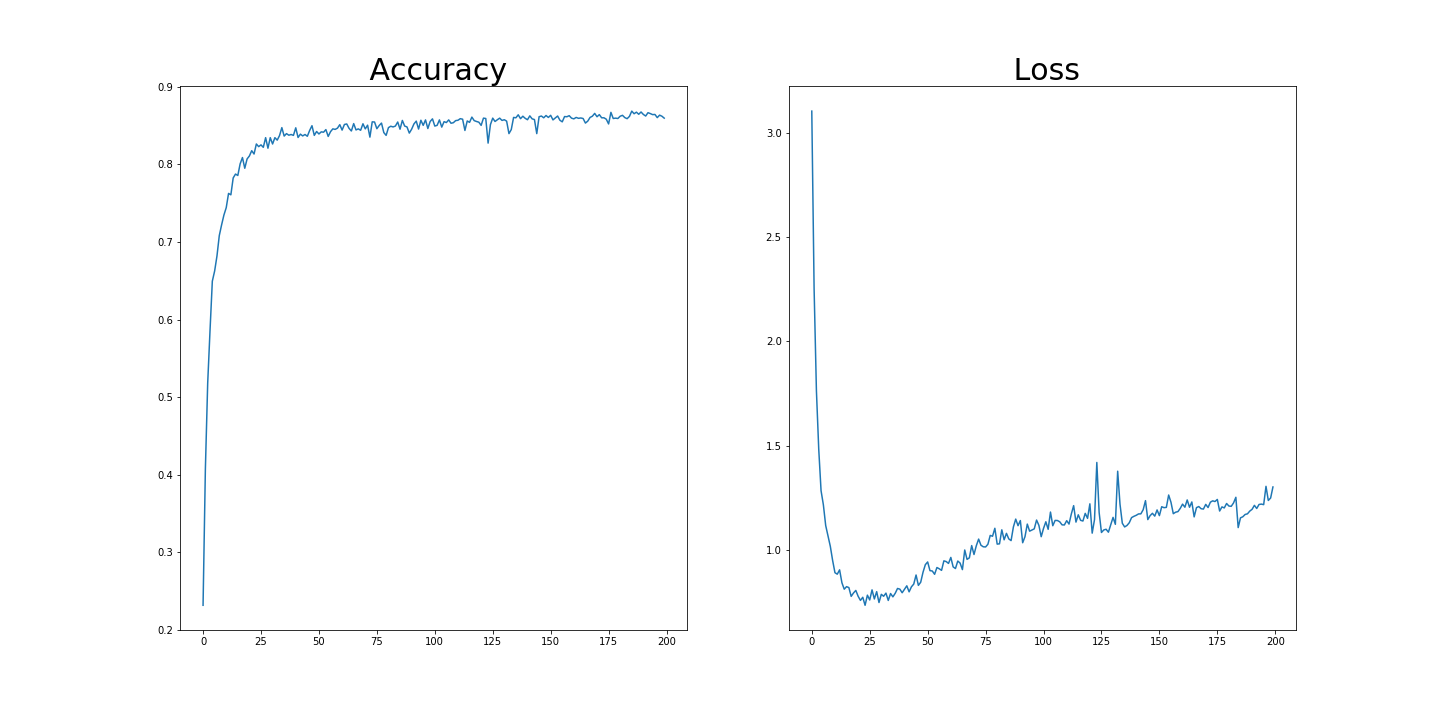

In [8]:
from IPython.display import Image, display_png
# png_file: str
display_png(Image('/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/figure_epoch200_rate_0.0001_batch128.png'))


In [9]:
# Reconfigure CNN

# introduce batch normalization after convolution  
keep_prob_1 = tf.placeholder(tf.float32)
keep_prob_2 = tf.placeholder(tf.float32)
def self_difined_CNN(x,keep_prob_1,keep_prob_2):  
    input_shape = x.shape.as_list()
    # Layer 1: Convolutional. Input = 36x36x1. Output = 32x32x8.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, input_shape[3], 8), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(8))
    conv1   = conv2d(x, conv1_W,conv1_b, strides=1, padding='VALID')
    
    # Batch normalization
    print(conv1.shape.as_list())
    batch1_scale = tf.Variable(tf.ones(8))
    batch1_offset = tf.Variable(tf.zeros(8))
    conv1 = tf.nn.batch_normalization(conv1, 0, 1, batch1_offset, batch1_scale, 1e-8)
    
    # Pooling. Input = 32x32x8. Output = 16x16x8.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Drop out mask
    conv1 = tf.nn.dropout(conv1, keep_prob_1)
        
    # Layer 2: Convolutional. Output = 12x12x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 8, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = conv2d(conv1, conv2_W,conv2_b, strides=1, padding='VALID')

    
    # Batch normalization
    batch2_scale = tf.Variable(tf.ones(16))
    batch2_offset = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.batch_normalization(conv2, 0, 1, batch2_offset, batch2_scale, 1e-8)
    
    """
    # Pooling. Input = 12x12x16. Output = 6x6x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    """
    
    
    # Drop out mask
    #conv2 = tf.nn.dropout(conv2, keep_prob_2)
    
    # Layer 3: Convolutional. Output = 8x8x64.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = conv2d(conv2, conv3_W,conv3_b, strides=1, padding='VALID')
    
    # Batch normalization
    batch3_scale = tf.Variable(tf.ones(64))
    batch3_offset = tf.Variable(tf.zeros(64))
    conv3 = tf.nn.batch_normalization(conv3, 0, 1, batch3_offset, batch3_scale, 1e-8)

    # Pooling. Input = 8x8x64. Output = 4x4x64.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Drop out mask
    #conv3 = tf.nn.dropout(conv3, keep_prob_2)

    # Flatten. Input = 4x4x64. Output = 1024.
    fc0   = flatten(conv3)
    
    # Layer 4: Fully Connected. Input = 1024. Output = 310.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1024, 310), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(310))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Drop out mask
    fc1 = tf.nn.dropout(fc1, keep_prob_2)

    # Layer 5: Fully Connected. Input = 172. Output = 120.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(310, 200), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(200))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    # Drop out mask
    #fc2 = tf.nn.dropout(fc2, keep_prob_2)
    
    # Layer 6: Fully Connected. Input = 200. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(200, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [10]:
is_rgb = 0
# Set Constant Values
if is_rgb == 0:
    x = tf.placeholder(tf.float32, (None, 36, 36, 1))
else:
    x = tf.placeholder(tf.float32, (None, 36, 36, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Training...
EPOCH 1 ...
Accuracy = 0.257
Cross entropy = 3.022
EPOCH 2 ...
Accuracy = 0.445
Cross entropy = 2.101
EPOCH 3 ...
Accuracy = 0.552
Cross entropy = 1.598
EPOCH 4 ...
Accuracy = 0.626
Cross entropy = 1.326
EPOCH 5 ...
Accuracy = 0.679
Cross entropy = 1.138
EPOCH 6 ...
Accuracy = 0.707
Cross entropy = 1.034
EPOCH 7 ...
Accuracy = 0.736
Cross entropy = 0.942
EPOCH 8 ...
Accuracy = 0.746
Cross entropy = 0.892
EPOCH 9 ...
Accuracy = 0.767
Cross entropy = 0.836
EPOCH 10 ...
Accuracy = 0.791
Cross entropy = 0.776
EPOCH 11 ...
Accuracy = 0.795
Cross entropy = 0.771
EPOCH 12 ...
Accuracy = 0.799
Cross entropy = 0.763
EPOCH 13 ...
Accuracy = 0.810
Cross entropy = 0.7

Accuracy = 0.884
Cross entropy = 1.028
EPOCH 140 ...
Accuracy = 0.879
Cross entropy = 1.046
EPOCH 141 ...
Accuracy = 0.886
Cross entropy = 1.022
EPOCH 142 ...
Accuracy = 0.884
Cross entropy = 1.061
EPOCH 143 ...
Accuracy = 0.886
Cross entropy = 1.033
EPOCH 144 ...
Accuracy = 0.883
Cross entropy = 1.032
EPOCH 145 ...
Accuracy = 0.877
Cross entropy = 1.119
EPOCH 146 ...
Accuracy = 0.881
Cross entropy = 1.008
EPOCH 147 ...
Accuracy = 0.885
Cross entropy = 1.002
EPOCH 148 ...
Accuracy = 0.887
Cross entropy = 0.981
EPOCH 149 ...
Accuracy = 0.881
Cross entropy = 1.013
EPOCH 150 ...
Accuracy = 0.881
Cross entropy = 1.019
EPOCH 151 ...
Accuracy = 0.883
Cross entropy = 1.018
EPOCH 152 ...
Accuracy = 0.879
Cross entropy = 1.039
EPOCH 153 ...
Accuracy = 0.884
Cross entropy = 1.028
EPOCH 154 ...
Accuracy = 0.878
Cross entropy = 1.061
EPOCH 155 ...
Accuracy = 0.889
Cross entropy = 1.008
EPOCH 156 ...
Accuracy = 0.885
Cross entropy = 1.032
EPOCH 157 ...
Accuracy = 0.885
Cross entropy = 1.039
EPOCH 1

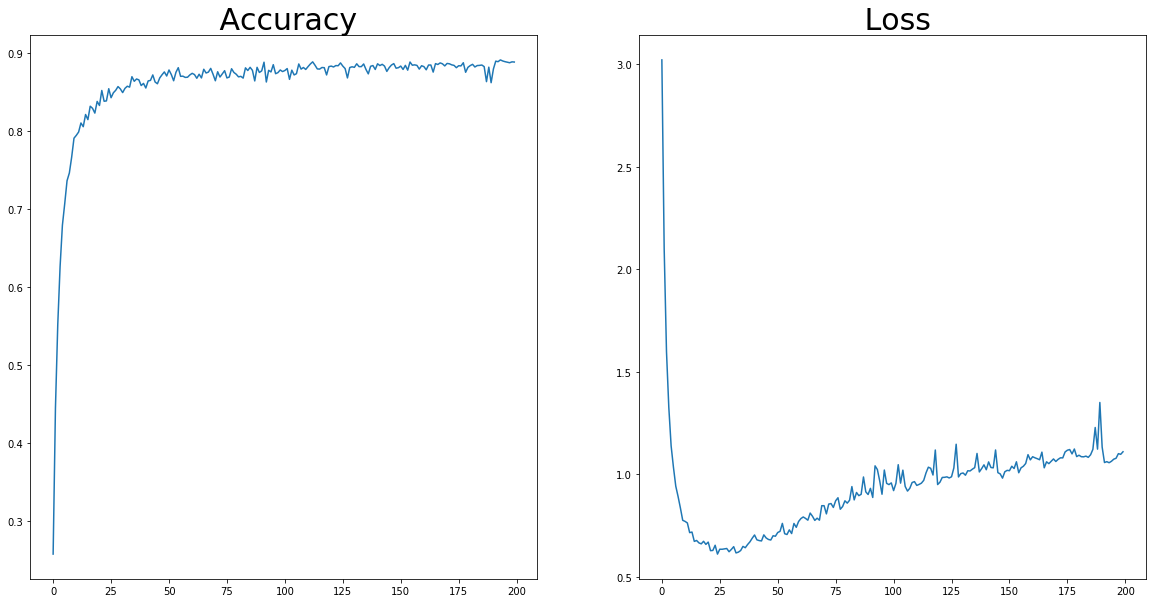

In [13]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.0001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
# to save result
saver = tf.train.Saver()

# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
def evaluation(X_eval,y_eval,is_rgb=0):
    sess = tf.get_default_session()
    total_ac = 0
    total_loss = 0
    ### gray_ver ###
    if is_rgb == 0:
        X_processed , y_processed = pre_process(X_eval,y_eval)
    #endif
    ################
    ### rgb_ver ###
    else:
        X_processed , y_processed = pre_process_keep_rgb(X_eval,y_eval)
    #endif
    ###############
    for offset in range(0, n_valid, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_processed[offset:end], y_processed[offset:end]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        loss     = sess.run(cross_entropy,feed_dict={x: batch_x, y: batch_y})
        mean_loss = np.mean(loss)
        total_ac += (accuracy * len(batch_x))
        total_loss += (mean_loss * len(batch_x)) 
    return total_ac/n_valid,total_loss/n_valid
with tf.Session(config=configure) as sess:
    sess.run(tf.global_variables_initializer())
    print("Training...")
    accuracy_array = np.zeros((EPOCHS))
    loss_array = np.zeros((EPOCHS))
    for i in range(EPOCHS):
        if ((i > 10) & ((accuracy_array[i-1]-np.max(accuracy_array)) < -0.05)):
            break
        ### gray_ver ###
        if is_rgb == 0:
            X_train_processed , y_train_processed = pre_process( X_train,y_train)
        #endif
        ################
        ### rgb_ver ###
        else:
            X_train_processed , y_train_processed = pre_process_keep_rgb(X_train,y_train)
        #endif
        ###############
        for offset in range(0,n_train,BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_processed[offset:end],y_train_processed[offset:end]
            sess.run(training_operation, feed_dict={x:batch_x, y:batch_y})

        print("EPOCH {} ...".format(i+1))
        valid_ac,valid_loss = evaluation(X_valid, y_valid,is_rgb)
        accuracy_array[i] = valid_ac
        loss_array[i] =valid_loss
        print("Accuracy = {:.3f}".format(valid_ac))
        print("Cross entropy = {:.3f}".format(valid_loss))

    saver.save(sess, './lenet_is_rgb{0}'.format(is_rgb))

    if is_rgb==0:
        f_1, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
        ax1.plot(accuracy_array)
        ax1.set_title(' Accuracy', fontsize=30)
        ax2.plot(loss_array)
        ax2.set_title(' Loss', fontsize=30)
        f_1.savefig('figure_epoch{0}_rate_{1}_batch{2}_is_rgb{3}.png'.format(EPOCHS,rate,BATCH_SIZE,is_rgb))
        print("Model saved")
    if is_rgb==1:
        f_2, (ax3, ax4) = plt.subplots(1, 2,figsize=(20,10))
        ax3.plot(accuracy_array)
        ax3.set_title(' Accuracy', fontsize=30)
        ax4.plot(loss_array)
        ax4.set_title(' Loss', fontsize=30)
        f_2.savefig('figure_epoch{0}_rate_{1}_batch{2}_is_rgb{3}.png'.format(EPOCHS,rate,BATCH_SIZE,is_rgb))
        print("Model saved")

[None, 32, 32, 8]
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Training...
EPOCH 1 ...
Accuracy = 0.130
Cross entropy = 3.427
EPOCH 2 ...
Accuracy = 0.315
Cross entropy = 2.560
EPOCH 3 ...
Accuracy = 0.482
Cross entropy = 1.816
EPOCH 4 ...
Accuracy = 0.589
Cross entropy = 1.409
EPOCH 5 ...
Accuracy = 0.659
Cross entropy = 1.198
EPOCH 6 ...
Accuracy = 0.723
Cross entropy = 0.953
EPOCH 7 ...
Accuracy = 0.746
Cross entropy = 0.863
EPOCH 8 ...
Accuracy = 0.771
Cross entropy = 0.755
EPOCH 9 ...
Accuracy = 0.791
Cross entropy = 0.699
EPOCH 10 ...
Accuracy = 0.805
Cross entropy = 0.654
EPOCH 11 ...
Accuracy = 0.820
Cross entropy = 0.638
EPOCH 12 ...
Accuracy = 0.833
Cross entropy = 0.584
EPOCH 13 ...
Accuracy = 0.840
Cross entropy = 0.578
EPOCH 14 ...
Accuracy = 0.830
Cross entropy = 0.552
EPOCH 15 ...
Accuracy = 0.849
Cross entropy = 0.537
EPOCH 16 ...
Accuracy = 0.854
Cross entropy = 0.521
EPOCH 17 ...
Accuracy = 0.863
Cr

EPOCH 152 ...
Accuracy = 0.940
Cross entropy = 0.293
EPOCH 153 ...
Accuracy = 0.941
Cross entropy = 0.292
EPOCH 154 ...
Accuracy = 0.939
Cross entropy = 0.311
EPOCH 155 ...
Accuracy = 0.932
Cross entropy = 0.350
EPOCH 156 ...
Accuracy = 0.938
Cross entropy = 0.343
EPOCH 157 ...
Accuracy = 0.942
Cross entropy = 0.348
EPOCH 158 ...
Accuracy = 0.936
Cross entropy = 0.377
EPOCH 159 ...
Accuracy = 0.944
Cross entropy = 0.296
EPOCH 160 ...
Accuracy = 0.940
Cross entropy = 0.342
EPOCH 161 ...
Accuracy = 0.940
Cross entropy = 0.357
EPOCH 162 ...
Accuracy = 0.940
Cross entropy = 0.371
EPOCH 163 ...
Accuracy = 0.938
Cross entropy = 0.325
EPOCH 164 ...
Accuracy = 0.942
Cross entropy = 0.376
EPOCH 165 ...
Accuracy = 0.931
Cross entropy = 0.396
EPOCH 166 ...
Accuracy = 0.939
Cross entropy = 0.385
EPOCH 167 ...
Accuracy = 0.940
Cross entropy = 0.376
EPOCH 168 ...
Accuracy = 0.939
Cross entropy = 0.375
EPOCH 169 ...
Accuracy = 0.940
Cross entropy = 0.340
EPOCH 170 ...
Accuracy = 0.944
Cross entropy =

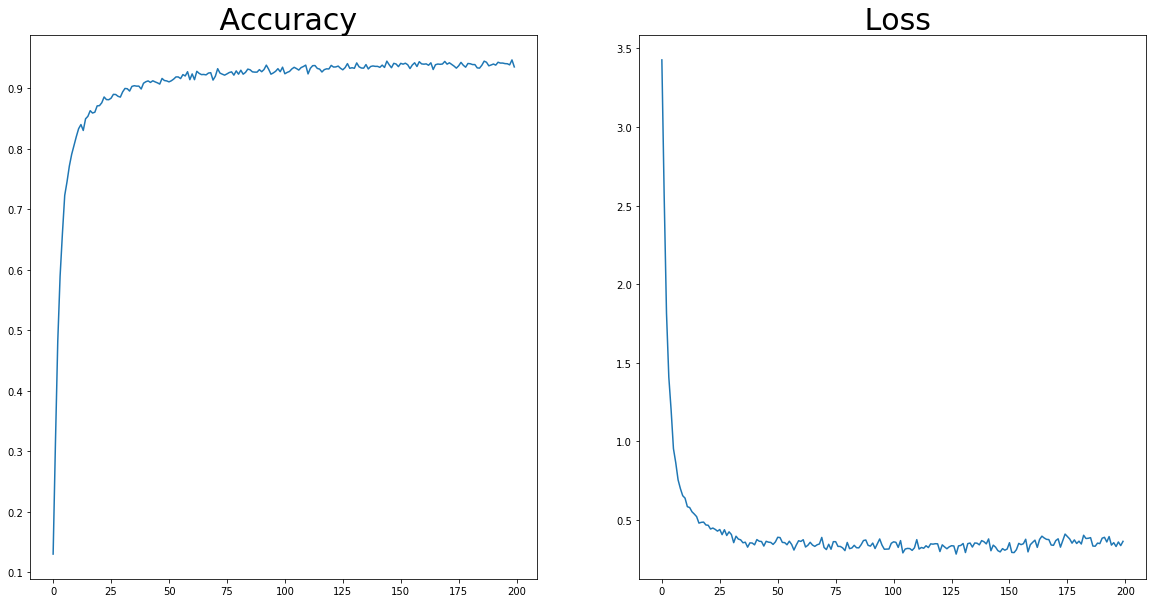

In [14]:
# Self difined CNN , no data augumentation

### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.0001

logits = self_difined_CNN(x,keep_prob_1,keep_prob_2)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
# to save result
saver = tf.train.Saver()

# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
def evaluation(X_eval,y_eval,is_rgb=0):
    sess = tf.get_default_session()
    total_ac = 0
    total_loss = 0
    ### gray_ver ###
    if is_rgb == 0:
        X_processed , y_processed = pre_process(X_eval,y_eval)
    #endif
    ################
    ### rgb_ver ###
    else:
        X_processed , y_processed = pre_process_keep_rgb(X_eval,y_eval)
    #endif
    ###############
    for offset in range(0, n_valid, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_processed[offset:end], y_processed[offset:end]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob_1:0.8,keep_prob_2:0.5})
        loss     = sess.run(cross_entropy,feed_dict={x: batch_x, y: batch_y,keep_prob_1:0.8,keep_prob_2:0.5})
        mean_loss = np.mean(loss)
        total_ac += (accuracy * len(batch_x))
        total_loss += (mean_loss * len(batch_x)) 
    return total_ac/n_valid,total_loss/n_valid
with tf.Session(config=configure) as sess:
    sess.run(tf.global_variables_initializer())
    print("Training...")
    accuracy_array = np.zeros((EPOCHS))
    loss_array = np.zeros((EPOCHS))
    for i in range(EPOCHS):
        ### gray_ver ###
        if is_rgb == 0:
            X_train_processed , y_train_processed = pre_process( X_train,y_train)
        #endif
        ################
        ### rgb_ver ###
        else:
            X_train_processed , y_train_processed = pre_process_keep_rgb(X_train,y_train)
        #endif
        ###############
        for offset in range(0,n_train,BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_processed[offset:end],y_train_processed[offset:end]
            sess.run(training_operation, feed_dict={x:batch_x, y:batch_y,keep_prob_1:0.8,keep_prob_2:0.5})

        print("EPOCH {} ...".format(i+1))
        valid_ac,valid_loss = evaluation(X_valid, y_valid,is_rgb)
        accuracy_array[i] = valid_ac
        loss_array[i] =valid_loss
        print("Accuracy = {:.3f}".format(valid_ac))
        print("Cross entropy = {:.3f}".format(valid_loss))

    saver.save(sess, './self_difined_CNN_ver2_is_rgb{0}'.format(is_rgb))

    if is_rgb==0:
        f_1, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
        ax1.plot(accuracy_array)
        ax1.set_title(' Accuracy', fontsize=30)
        ax2.plot(loss_array)
        ax2.set_title(' Loss', fontsize=30)
        f_1.savefig('self_difined_CNN_ver2_figure_epoch{0}_rate_{1}_batch{2}_is_rgb{3}.png'.format(EPOCHS,rate,BATCH_SIZE,is_rgb))
        print("Model saved")
    if is_rgb==1:
        f_2, (ax3, ax4) = plt.subplots(1, 2,figsize=(20,10))
        ax3.plot(accuracy_array)
        ax3.set_title(' Accuracy', fontsize=30)
        ax4.plot(loss_array)
        ax4.set_title(' Loss', fontsize=30)
        f_2.savefig('self_difined_CNN_ver2_figure_epoch{0}_rate_{1}_batch{2}_is_rgb{3}.png'.format(EPOCHS,rate,BATCH_SIZE,is_rgb))
        print("Model saved")

In [17]:
# Reconfigure CNN

# introduce batch normalization after convolution  
keep_prob_1 = tf.placeholder(tf.float32)
keep_prob_2 = tf.placeholder(tf.float32)
def self_difined_CNN_last_ver(x,keep_prob_1,keep_prob_2): 
    input_shape = x.shape.as_list()
    W = {
        "conv1_W" : tf.Variable(tf.truncated_normal(shape=(5, 5, input_shape[3], 8), mean = mu, stddev = sigma)),
        "conv2_W" : tf.Variable(tf.truncated_normal(shape=(5, 5, 8, 16), mean = mu, stddev = sigma)),
        "conv3_W" : tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 64), mean = mu, stddev = sigma)),
        "fc1_W" : tf.Variable(tf.truncated_normal(shape=(1024, 310), mean = mu, stddev = sigma)),
        "fc2_W" : tf.Variable(tf.truncated_normal(shape=(310, 200), mean = mu, stddev = sigma)),
        "fc3_W" : tf.Variable(tf.truncated_normal(shape=(200, n_classes), mean = mu, stddev = sigma)),
    }


    b = {
        "conv1_b" : tf.Variable(tf.zeros(8)),
        "conv2_b" : tf.Variable(tf.zeros(16)),
        "conv3_b" : tf.Variable(tf.zeros(64)),
        "fc1_b" : tf.Variable(tf.zeros(310)),
        "fc2_b"  : tf.Variable(tf.zeros(200)),
        "fc3_b"  : tf.Variable(tf.zeros(n_classes)),
    }

    scale = {
        "batch1_scale" : tf.Variable(tf.ones(8)),
        "batch2_scale" : tf.Variable(tf.ones(16)),
        "batch3_scale" : tf.Variable(tf.ones(64)),
    }

    offset = {
        "batch1_offset" : tf.Variable(tf.zeros(8)),
        "batch2_offset" : tf.Variable(tf.zeros(16)),
        "batch3_offset" : tf.Variable(tf.zeros(64)),
    }

    
    
    
    # Layer 1: Convolutional. Input = 36x36x1. Output = 32x32x8.
    conv1   = conv2d(x, W["conv1_W"],b["conv1_b"], strides=1, padding='VALID')
    # Batch normalization
    conv1 = tf.nn.batch_normalization(conv1, 0, 1, offset["batch1_offset"], scale["batch1_scale"], 1e-8)
    # Pooling. Input = 32x32x8. Output = 16x16x8.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # Drop out mask
    conv1 = tf.nn.dropout(conv1, keep_prob_1)
        
        
        
    # Layer 2: Convolutional. Output = 12x12x16.   
    conv2   = conv2d(conv1,  W["conv2_W"],b["conv2_b"], strides=1, padding='VALID')
    # Batch normalization
    conv2 = tf.nn.batch_normalization(conv2, 0, 1, offset["batch2_offset"], scale["batch2_scale"], 1e-8)
    # Drop out mask
    #conv2 = tf.nn.dropout(conv2, keep_prob_2)
    
    # Layer 3: Convolutional. Output = 8x8x64.
    conv3   = conv2d(conv2, W["conv3_W"],b["conv3_b"], strides=1, padding='VALID')
    
    # Batch normalization
    batch3_scale = tf.Variable(tf.ones(64))
    batch3_offset = tf.Variable(tf.zeros(64))
    conv3 = tf.nn.batch_normalization(conv3, 0, 1, offset["batch3_offset"], scale["batch3_scale"], 1e-8)

    # Pooling. Input = 8x8x64. Output = 4x4x64.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Drop out mask
    #conv3 = tf.nn.dropout(conv3, keep_prob_2)

    # Flatten. Input = 4x4x64. Output = 1024.
    fc0   = flatten(conv3)
    
    # Layer 4: Fully Connected. Input = 1024. Output = 310.
    fc1   = tf.matmul(fc0, W["fc1_W"]) + b["fc1_b"]
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Drop out mask
    fc1 = tf.nn.dropout(fc1, keep_prob_2)

    # Layer 5: Fully Connected. Input = 172. Output = 120.
    fc2_b  = tf.Variable(tf.zeros(200))
    fc2    = tf.matmul(fc1, W["fc2_W"]) + b["fc2_b"]
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    # Drop out mask
    #fc2 = tf.nn.dropout(fc2, keep_prob_2)
    
    # Layer 6: Fully Connected. Input = 200. Output = n_classes.
    logits = tf.matmul(fc2, W["fc3_W"]) + b["fc3_b"]
    
    return logits

Training...
EPOCH 1 ...
Accuracy = 0.154
Cross entropy = 3.358
EPOCH 2 ...
Accuracy = 0.390
Cross entropy = 2.295
EPOCH 3 ...
Accuracy = 0.557
Cross entropy = 1.593
EPOCH 4 ...
Accuracy = 0.644
Cross entropy = 1.221
EPOCH 5 ...
Accuracy = 0.709
Cross entropy = 1.006
EPOCH 6 ...
Accuracy = 0.743
Cross entropy = 0.880
EPOCH 7 ...
Accuracy = 0.778
Cross entropy = 0.782
EPOCH 8 ...
Accuracy = 0.796
Cross entropy = 0.704
EPOCH 9 ...
Accuracy = 0.818
Cross entropy = 0.649
EPOCH 10 ...
Accuracy = 0.826
Cross entropy = 0.616
EPOCH 11 ...
Accuracy = 0.838
Cross entropy = 0.578
EPOCH 12 ...
Accuracy = 0.855
Cross entropy = 0.556
EPOCH 13 ...
Accuracy = 0.864
Cross entropy = 0.501
EPOCH 14 ...
Accuracy = 0.855
Cross entropy = 0.497
EPOCH 15 ...
Accuracy = 0.871
Cross entropy = 0.472
EPOCH 16 ...
Accuracy = 0.870
Cross entropy = 0.474
EPOCH 17 ...
Accuracy = 0.881
Cross entropy = 0.446
EPOCH 18 ...
Accuracy = 0.878
Cross entropy = 0.457
EPOCH 19 ...
Accuracy = 0.889
Cross entropy = 0.428
EPOCH 20 

EPOCH 158 ...
Accuracy = 0.945
Cross entropy = 0.360
EPOCH 159 ...
Accuracy = 0.944
Cross entropy = 0.356
EPOCH 160 ...
Accuracy = 0.948
Cross entropy = 0.283
EPOCH 161 ...
Accuracy = 0.944
Cross entropy = 0.353
EPOCH 162 ...
Accuracy = 0.946
Cross entropy = 0.317
EPOCH 163 ...
Accuracy = 0.947
Cross entropy = 0.313
EPOCH 164 ...
Accuracy = 0.953
Cross entropy = 0.276
EPOCH 165 ...
Accuracy = 0.945
Cross entropy = 0.327
EPOCH 166 ...
Accuracy = 0.946
Cross entropy = 0.355
EPOCH 167 ...
Accuracy = 0.949
Cross entropy = 0.330
EPOCH 168 ...
Accuracy = 0.944
Cross entropy = 0.321
EPOCH 169 ...
Accuracy = 0.944
Cross entropy = 0.341
EPOCH 170 ...
Accuracy = 0.946
Cross entropy = 0.316
EPOCH 171 ...
Accuracy = 0.945
Cross entropy = 0.371
EPOCH 172 ...
Accuracy = 0.947
Cross entropy = 0.323
EPOCH 173 ...
Accuracy = 0.946
Cross entropy = 0.311
EPOCH 174 ...
Accuracy = 0.948
Cross entropy = 0.316
EPOCH 175 ...
Accuracy = 0.950
Cross entropy = 0.294
EPOCH 176 ...
Accuracy = 0.946
Cross entropy =

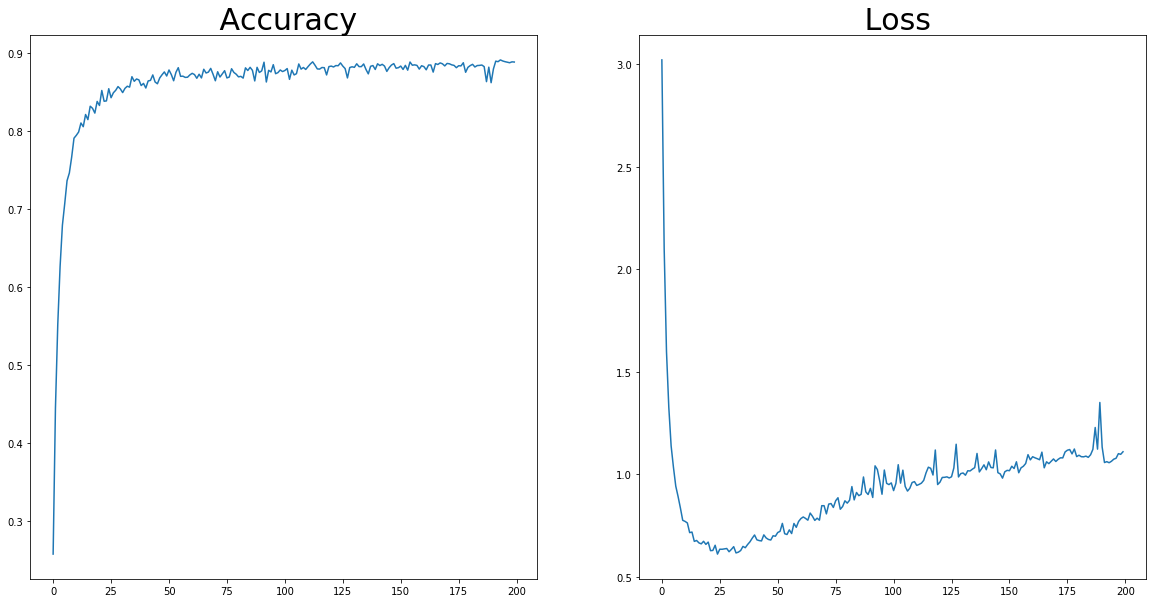

In [27]:
# Self difined CNN , with data augumentation

### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.0001
EPOCHS=1000
logits = self_difined_CNN_last_ver(x,keep_prob_1,keep_prob_2)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
# to save result
saver = tf.train.Saver(max_to_keep=100)
parameter = {'accuracy_array' : np.array([]),
             'loss_array' : np.array([])}
# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
def evaluation(X_eval,y_eval,is_rgb=0):
    sess = tf.get_default_session()
    total_ac = 0
    total_loss = 0
    ### gray_ver ###
    if is_rgb == 0:
        X_processed , y_processed = pre_process(X_eval,y_eval)
    #endif
    ################
    ### rgb_ver ###
    else:
        X_processed , y_processed = pre_process_keep_rgb(X_eval,y_eval)
    #endif
    ###############
    for offset in range(0, n_valid, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_processed[offset:end], y_processed[offset:end]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob_1:0.8,keep_prob_2:0.5})
        loss     = sess.run(cross_entropy,feed_dict={x: batch_x, y: batch_y,keep_prob_1:0.8,keep_prob_2:0.5})
        mean_loss = np.mean(loss)
        total_ac += (accuracy * len(batch_x))
        total_loss += (mean_loss * len(batch_x)) 
    return total_ac/len(X_eval),total_loss/len(X_eval)

with tf.Session(config=configure) as sess:
    sess.run(tf.global_variables_initializer())
    print("Training...")
    for i in range(EPOCHS):
        ### early stopping
        if i>200:
            if ((parameter["accuracy_array"][i-1]-np.max(parameter["accuracy_array"])) < -0.01):
                break
            elif ((np.max(parameter["accuracy_array"][i-21:i-1])-np.max(parameter["accuracy_array"][i-41:i-21])) <= 0.0):
                break
            #endif
        #endif
        ### gray_ver ###
        if is_rgb == 0:
            X_train_processed , y_train_processed = pre_process( X_train,y_train)
        #endif
        ################
        ### rgb_ver ###
        else:
            X_train_processed , y_train_processed = pre_process_keep_rgb(X_train,y_train)
        #endif
        ###############
        
        for offset in range(0,n_train,BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_processed[offset:end],y_train_processed[offset:end]
            sess.run(training_operation, feed_dict={x:batch_x, y:batch_y,keep_prob_1:0.8,keep_prob_2:0.5})
        #endofor
        print("EPOCH {} ...".format(i+1))
        valid_ac,valid_loss = evaluation(X_valid, y_valid,is_rgb)
        parameter["accuracy_array"] = np.append(parameter["accuracy_array"],valid_ac)
        parameter["loss_array"] = np.append(parameter["loss_array"],valid_loss)
        print("Accuracy = {:.3f}".format(valid_ac))
        print("Cross entropy = {:.3f}".format(valid_loss))
        saver.save(sess, './self_difined_CNN_last_ver_is_rgb{0}_{1}th_epoch'.format(is_rgb,i+1))
    #endfor
    
    #save best model.

    #endwith
    ind = np.argmax(parameter["accuracy_array"])

    print("Best epoch is {0}".format(ind+1))
    saver.restore(sess,'./self_difined_CNN_last_ver_is_rgb{0}_{1}th_epoch'.format(is_rgb,ind+1))
    

    valid_ac,valid_loss = evaluation(X_valid, y_valid,is_rgb)
    saver.save(sess, './self_difined_CNN_last_ver_is_rgb{0}'.format(is_rgb))
    print("Best Model Accuracy = {:.3f}".format(valid_ac))
    


    if is_rgb==0:
        f_1, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
        ax1.plot(parameter["accuracy_array"])
        ax1.set_title(' Accuracy', fontsize=30)
        ax2.plot(parameter["loss_array"])
        ax2.set_title(' Loss', fontsize=30)
        f_1.savefig('self_difined_CNN_last_ver_figure_epoch{0}_rate_{1}_batch{2}_is_rgb{3}.png'.format(EPOCHS,rate,BATCH_SIZE,is_rgb))
        print("Model saved")
    #endif
    if is_rgb==1:
        f_2, (ax3, ax4) = plt.subplots(1, 2,figsize=(20,10))
        ax3.plot(parameter["accuracy_array"])
        ax3.set_title(' Accuracy', fontsize=30)
        ax4.plot(parameter["loss_array"])
        ax4.set_title(' Loss', fontsize=30)
        f_2.savefig('self_difined_CNN_last_ver_figure_epoch{0}_rate_{1}_batch{2}_is_rgb{3}.png'.format(EPOCHS,rate,BATCH_SIZE,is_rgb))
        print("Model saved")
    #endif
#endwith

### Augment data to make more robust model.

1. change luminance
1. enhance contrast
1. add noise
1. perspective transform

I use 4th method to adapt change in viewing angle.
In driving situation, I think that possible rotational direction are roll,pitch and yaw , because there are curve,slope and tilted roads.(x-y plane is same as image plane.x-axis:vertical,y-axis:horizontal)
I assume z value is always equal zero.

[//]: # (Image References)

[example]: ./examples.png

As shown below, Dataset already has data which has various luminance and is in various situation (I mean that there is enough data in terms of contrast too).
So I only use 3rd and 4th method in training section.
Then,in test section, I use all methods and take mean value to judge labels.

![alt text][example]



In [6]:
import math
def change_luminance(image,gamma):
    # gamma transrate
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    hls[:,:,1] = 255*pow(hls[:,:,1]/255,1.0/gamma)
    output_image = cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)
    return output_image
"""
def enhance_contrast(image,ratio):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    hls[:,:,1] = np.clip(hls[:,:,1]*ratio,0,255)
    output_image = cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)
    return output_image
    
def add_white_noise(image,sigma):
    output_image[:,:,:] = np.clip(image[:,:,:] + [math.ceil(random.gause(127,127*sigma))],0,255)
    return output_image
"""
def perspective_transform(image,roll=0,pitch=0,yaw=0):
    ###I assume that ,compare to a possible distance between a car and a sign,size of tarffic sign is small enough to ignore the difference 
    #between near side edge line length and far side one. ### 
    img_size = (image.shape[1],image.shape[0])
    src = np.float32([(0,0),(image.shape[1],image.shape[0]),(image.shape[1],0),(0,image.shape[0])])
    dst_roll = np.float32([(0,0),(image.shape[1],image.shape[0]*np.sin(np.deg2rad(roll))),(image.shape[1],0),(0,image.shape[0]*np.sin(np.deg2rad(roll)))])
    dst_pitch = np.float32([(0,0),(image.shape[1]*np.cos(np.deg2rad(pitch)),image.shape[0]),(image.shape[1]*np.cos(np.deg2rad(pitch)),0),(0,image.shape[0])])
    dst_yaw = np.float32([(0,0),(image.shape[1]*np.cos(np.deg2rad(yaw))-image.shape[0]*np.sin(np.deg2rad(yaw)),image.shape[1]*np.sin(np.deg2rad(yaw))+image.shape[0]*np.cos(np.deg2rad(yaw))),(image.shape[1]*np.cos(np.deg2rad(yaw)),image.shape[1]*np.sin(np.deg2rad(yaw))),(-image.shape[0]*np.sin(np.deg2rad(yaw)),image.shape[0]*np.cos(np.deg2rad(yaw)))])
    
    M_roll = cv2.getPerspectiveTransform(src, dst_roll)
    M_pitch = cv2.getPerspectiveTransform(src, dst_pitch)
    M_yaw = cv2.getPerspectiveTransform(src, dst_yaw)
    
    img_roll = cv2.warpPerspective(image, M_roll, img_size, flags=cv2.INTER_LINEAR)
    img_roll_pitch = cv2.warpPerspective(img_roll, M_pitch, img_size, flags=cv2.INTER_LINEAR)
    output_image = cv2.warpPerspective(img_roll_pitch, M_yaw, img_size, flags=cv2.INTER_LINEAR)
    
    return output_image

def perspective_transform_ver2(image,M):
    ###I assume that ,compare to a possible distance between a car and a sign,size of tarffic sign is small enough to ignore the difference 
    #between near side edge line length and far side one. ### 
    image_shape = (image.shape[1],image.shape[0])
    output_image = cv2.warpPerspective(image, M, image_shape, flags=cv2.INTER_LINEAR)
    return output_image

### data-augmentation for train data ###

##change luminance ##
for j in range(2):
    if j == 0:
        gamma = 0.75
    else:
        gamma = 1.5
    for i in range(len(X_train)):
        if ((i == 0) & (j == 0)):
            X_train_change_luminance = change_luminance(X_train[i],gamma)
        else:
            X_train_change_luminance = np.concatenate((X_train_change_luminance,change_luminance(X_train[i],gamma)),axis=0)
    #endfor
#endfor
print("Saving...")
with open("./X_train_change_luminance.p", mode='wb') as f:
    pickle.dump(X_train_change_luminance, f)
    
######################
"""
for i in range(len(X_train)):
    if (i == 0):
        X_add_white_noise = add_white_noise(X_train[i],0.05)
"""
## rotate ##
roll_array = [-20,-10,10,20]
pitch_array = [-10,-5,5,10]
yaw_array = [-10,-5,5,10]

for roll in roll_array:
    for i in range(len(X_train)):
        if ((i == 0)&(roll == -20)):
            X_train_rotate_roll = perspective_transform(X_train[i],roll=roll)
        else:
            X_train_rotate_roll = np.concatenate((X_train_rotate_roll,perspective_transform(X_train[i],roll=roll)),axis=0)
for pitch in pitch_array:
    for i in range(len(X_train)):
        if ((i == 0)&(roll == -10)):
            X_train_rotate_pitch = perspective_transform(X_train[i],pitch=pitch)
        else:
            X_train_rotate_pitch = np.concatenate((X_train_rotate_pitch,perspective_transform(X_train[i],pitch=pitch)),axis=0)
for yaw in yaw_array:
    for i in range(len(X_train)):
        if ((i == 0)&(roll == -10)):
            X_train_rotate_yaw = perspective_transform(X_train[i],yaw=yaw)
        else:
            X_train_rotate_yaw = np.concatenate((X_train_rotate_yaw,perspective_transform(X_train[i],yaw=yaw)),axis=0)
X_train_rotate = np.concatenate((X_train_rotate_roll,X_train_rotate_pitch,X_train_rotate_yaw),axis=0)
print("Saving...")
with open("./X_train_rotate.p", mode='wb') as f:
    pickle.dump(X_train_rotate, f)
    
####################
import numpy.matlib

from scipy.misc import imresize

## zoom ##

from scipy.misc import imresize

for i in range(len(X_train)):
    image = X_train[i]
    if i == 0:
        X_train_zoomed = imresize(image[2:-2,2:-2,:],(32,32))
    else:
        X_train_zoomed = np.concatenate((X_train_zoomed,imresize(image[2:-2,2:-2,:],(32,32))),axis=0)

##########

X_train_new = np.concatenate((X_train,X_change_luminance,X_rotate,X_train_zoomed),axis=0)
y_train_new = np.matlib.repmat(y_train,1+2+4*3+1,1).reshape(n_train*(1+2+4*3+1),)

### flip the image . (This idea came from https://navoshta.com/traffic-signs-classification/)
# Classes of signs that they should be classified as the same class when flipped horizontally.
flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
# Classes of signs that they should be classified as the same class when flipped verticall., 
flippable_vertically = np.array([1, 5, 12, 15, 17])
# Classes of signs that they should be classified as the same class when flipped horizontally and then vertically.
flippable_both = np.array([32, 40])
# Classes of signs that they should be classified as another class when flipped horizontally.
cross_flippable = np.array([
        [19, 20], [33, 34], [36, 37], [38, 39],
        [20, 19], [34, 33], [37, 36], [39, 38],   
    ])

count = 0
y_train_flip = np.array([])
for i in range(n_train):
    if (y_train[i] in flippable_horizontally):
        if count == 0:
            X_train_flip = cv2.flip(X_train[i],1)
            count += 1
        else:
            X_train_flip = np.append(X_train_flip, np.expand_dims(cv2.flip(X_train[i],1),axis=0), axis=0)
        #endif
        y_train_flip = np.append(y_train_flip, y_train[i])
    #endif
    if (y_train[i] in flippable_vertically):
        if count == 0:
            X_train_flip = cv2.flip(X_train[i],0)
            count += 1
        else:
            X_train_flip = np.append(X_train_flip, np.expand_dims(cv2.flip(X_train[i],0),axis=0), axis=0)
        #endif
        y_train_flip = np.append(y_train_flip, y_train[i])
    #endif
    if (y_train[i] in flippable_both):
        if count == 0:
            X_train_flip = cv2.flip(X_train[i],-1)
            count += 1
        else:
            X_train_flip = np.append(X_train_flip, np.expand_dims(cv2.flip(X_train[i],-1),axis=0), axis=0)
        #endif
        y_train_flip = np.append(y_train_flip, y_train[i])
    #endif
    if (y_train[i] in cross_flippable[:, 0]):
        if count == 0:
            X_train_flip = cv2.flip(X_train[i],1)
            count += 1
        else:
            X_train_flip = np.append(X_train_flip, np.expand_dims(cv2.flip(X_train[i],1),axis=0), axis=0)
        #endif
        y_train_flip = np.append(y_train_flip, cross_flippable[y_train[i]==cross_flippable[:,0], 1])
    #endif
#endfor

X_train_new = np.concatenate((X_train_new,X_train_flip),axis=0)
y_train_new = np.concatenate((y_train_new,y_train_flip),axis=0)
print("Saving...")
with open("./X_train_augumented.p", mode='wb') as f:
    pickle.dump(X_train_new, f)
with open("./y_train_augumented.p", mode='wb') as f:
    pickle.dump(y_train_new, f)
print(X_trin_new.shape)
print(y_trin_new.shape)

### data-augmentation for train data ###

### data-augmentation for valid data ###

##change luminance ##
for j in range(2):
    if j == 0:
        gamma = 0.75
    else:
        gamma = 1.5
    for i in range(len(X_valid)):
        if ((i == 0) & (j == 0)):
            X_valid_change_luminance = change_luminance(X_valid[i],gamma)
        else:
            X_valid_change_luminance = np.concatenate((X_valid_change_luminance,change_luminance(X_valid[i],gamma)),axis=0)
    #endfor
#endfor
print("Saving...")
with open("./X_valid_change_luminance.p", mode='wb') as f:
    pickle.dump(X_valid_change_luminance, f)
    
######################
"""
for i in range(len(X_valid)):
    if (i == 0):
        X_add_white_noise = add_white_noise(X_valid[i],0.05)
"""
## rotate ##
roll_array = [-20,-10,10,20]
pitch_array = [-10,-5,5,10]
yaw_array = [-10,-5,5,10]

for roll in roll_array:
    for i in range(len(X_valid)):
        if ((i == 0)&(roll == -20)):
            X_valid_rotate_roll = perspective_transform(X_valid[i],roll=roll)
        else:
            X_valid_rotate_roll = np.concatenate((X_valid_rotate_roll,perspective_transform(X_valid[i],roll=roll)),axis=0)
for pitch in pitch_array:
    for i in range(len(X_valid)):
        if ((i == 0)&(roll == -10)):
            X_valid_rotate_pitch = perspective_transform(X_valid[i],pitch=pitch)
        else:
            X_valid_rotate_pitch = np.concatenate((X_valid_rotate_pitch,perspective_transform(X_valid[i],pitch=pitch)),axis=0)
for yaw in yaw_array:
    for i in range(len(X_valid)):
        if ((i == 0)&(roll == -10)):
            X_valid_rotate_yaw = perspective_transform(X_valid[i],yaw=yaw)
        else:
            X_valid_rotate_yaw = np.concatenate((X_valid_rotate_yaw,perspective_transform(X_valid[i],yaw=yaw)),axis=0)
X_valid_rotate = np.concatenate((X_valid_rotate_roll,X_valid_rotate_pitch,X_valid_rotate_yaw),axis=0)
print("Saving...")
with open("./X_valid_rotate.p", mode='wb') as f:
    pickle.dump(X_valid_rotate, f)
    
####################
import numpy.matlib

from scipy.misc import imresize

## zoom ##

from scipy.misc import imresize

for i in range(len(X_valid)):
    image = X_valid[i]
    if i == 0:
        X_valid_zoomed = imresize(image[2:-2,2:-2,:],(32,32))
    else:
        X_valid_zoomed = np.concatenate((X_valid_zoomed,imresize(image[2:-2,2:-2,:],(32,32))),axis=0)

##########

X_valid_new = np.concatenate((X_valid,X_change_luminance,X_rotate,X_valid_zoomed),axis=0)
y_valid_new = np.matlib.repmat(y_valid,1+2+4*3+1,1).reshape(n_valid*(1+2+4*3+1),)

### flip the image . (This idea came from https://navoshta.com/traffic-signs-classification/)
# Classes of signs that they should be classified as the same class when flipped horizontally.
flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
# Classes of signs that they should be classified as the same class when flipped verticall., 
flippable_vertically = np.array([1, 5, 12, 15, 17])
# Classes of signs that they should be classified as the same class when flipped horizontally and then vertically.
flippable_both = np.array([32, 40])
# Classes of signs that they should be classified as another class when flipped horizontally.
cross_flippable = np.array([
        [19, 20], [33, 34], [36, 37], [38, 39],
        [20, 19], [34, 33], [37, 36], [39, 38],   
    ])

count = 0
y_valid_flip = np.array([])
for i in range(n_valid):
    if (y_valid[i] in flippable_horizontally):
        if count == 0:
            X_valid_flip = cv2.flip(X_valid[i],1)
            count += 1
        else:
            X_valid_flip = np.append(X_valid_flip, np.expand_dims(cv2.flip(X_valid[i],1),axis=0), axis=0)
        #endif
        y_valid_flip = np.append(y_valid_flip, y_valid[i])
    #endif
    if (y_valid[i] in flippable_vertically):
        if count == 0:
            X_valid_flip = cv2.flip(X_valid[i],0)
            count += 1
        else:
            X_valid_flip = np.append(X_valid_flip, np.expand_dims(cv2.flip(X_valid[i],0),axis=0), axis=0)
        #endif
        y_valid_flip = np.append(y_valid_flip, y_valid[i])
    #endif
    if (y_valid[i] in flippable_both):
        if count == 0:
            X_valid_flip = cv2.flip(X_valid[i],-1)
            count += 1
        else:
            X_valid_flip = np.append(X_valid_flip, np.expand_dims(cv2.flip(X_valid[i],-1),axis=0), axis=0)
        #endif
        y_valid_flip = np.append(y_valid_flip, y_valid[i])
    #endif
    if (y_valid[i] in cross_flippable[:, 0]):
        if count == 0:
            X_valid_flip = cv2.flip(X_valid[i],1)
            count += 1
        else:
            X_valid_flip = np.append(X_valid_flip, np.expand_dims(cv2.flip(X_valid[i],1),axis=0), axis=0)
        #endif
        y_valid_flip = np.append(y_valid_flip, cross_flippable[y_valid[i]==cross_flippable[:,0], 1])
    #endif
#endfor

X_valid_new = np.concatenate((X_valid_new,X_valid_flip),axis=0)
y_valid_new = np.concatenate((y_valid_new,y_valid_flip),axis=0)
print("Saving...")
with open("./X_valid_augumented.p", mode='wb') as f:
    pickle.dump(X_valid_new, f)
with open("./y_valid_augumented.p", mode='wb') as f:
    pickle.dump(y_valid_new, f)
print(X_trin_new.shape)
print(y_trin_new.shape)

### data-augmentation for valid data ###

### data-augmentation for test data ###

##change luminance ##
for j in range(2):
    if j == 0:
        gamma = 0.75
    else:
        gamma = 1.5
    for i in range(len(X_test)):
        if ((i == 0) & (j == 0)):
            X_test_change_luminance = change_luminance(X_test[i],gamma)
        else:
            X_test_change_luminance = np.concatenate((X_test_change_luminance,change_luminance(X_test[i],gamma)),axis=0)
    #endfor
#endfor
print("Saving...")
with open("./X_test_change_luminance.p", mode='wb') as f:
    pickle.dump(X_test_change_luminance, f)
    
######################
"""
for i in range(len(X_test)):
    if (i == 0):
        X_add_white_noise = add_white_noise(X_test[i],0.05)
"""
## rotate ##
roll_array = [-20,-10,10,20]
pitch_array = [-10,-5,5,10]
yaw_array = [-10,-5,5,10]

for roll in roll_array:
    for i in range(len(X_test)):
        if ((i == 0)&(roll == -20)):
            X_test_rotate_roll = perspective_transform(X_test[i],roll=roll)
        else:
            X_test_rotate_roll = np.concatenate((X_test_rotate_roll,perspective_transform(X_test[i],roll=roll)),axis=0)
for pitch in pitch_array:
    for i in range(len(X_test)):
        if ((i == 0)&(roll == -10)):
            X_test_rotate_pitch = perspective_transform(X_test[i],pitch=pitch)
        else:
            X_test_rotate_pitch = np.concatenate((X_test_rotate_pitch,perspective_transform(X_test[i],pitch=pitch)),axis=0)
for yaw in yaw_array:
    for i in range(len(X_test)):
        if ((i == 0)&(roll == -10)):
            X_test_rotate_yaw = perspective_transform(X_test[i],yaw=yaw)
        else:
            X_test_rotate_yaw = np.concatenate((X_test_rotate_yaw,perspective_transform(X_test[i],yaw=yaw)),axis=0)
X_test_rotate = np.concatenate((X_test_rotate_roll,X_test_rotate_pitch,X_test_rotate_yaw),axis=0)
print("Saving...")
with open("./X_test_rotate.p", mode='wb') as f:
    pickle.dump(X_test_rotate, f)
    
####################
import numpy.matlib

from scipy.misc import imresize

## zoom ##

from scipy.misc import imresize

for i in range(len(X_test)):
    image = X_test[i]
    if i == 0:
        X_test_zoomed = imresize(image[2:-2,2:-2,:],(32,32))
    else:
        X_test_zoomed = np.concatenate((X_test_zoomed,imresize(image[2:-2,2:-2,:],(32,32))),axis=0)

##########

X_test_new = np.concatenate((X_test,X_change_luminance,X_rotate,X_test_zoomed),axis=0)
y_test_new = np.matlib.repmat(y_test,1+2+4*3+1,1).reshape(n_test*(1+2+4*3+1),)

### flip the image . (This idea came from https://navoshta.com/traffic-signs-classification/)
# Classes of signs that they should be classified as the same class when flipped horizontally.
flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
# Classes of signs that they should be classified as the same class when flipped verticall., 
flippable_vertically = np.array([1, 5, 12, 15, 17])
# Classes of signs that they should be classified as the same class when flipped horizontally and then vertically.
flippable_both = np.array([32, 40])
# Classes of signs that they should be classified as another class when flipped horizontally.
cross_flippable = np.array([
        [19, 20], [33, 34], [36, 37], [38, 39],
        [20, 19], [34, 33], [37, 36], [39, 38],   
    ])

count = 0
y_test_flip = np.array([])
for i in range(n_test):
    if (y_test[i] in flippable_horizontally):
        if count == 0:
            X_test_flip = cv2.flip(X_test[i],1)
            count += 1
        else:
            X_test_flip = np.append(X_test_flip, np.expand_dims(cv2.flip(X_test[i],1),axis=0), axis=0)
        #endif
        y_test_flip = np.append(y_test_flip, y_test[i])
    #endif
    if (y_test[i] in flippable_vertically):
        if count == 0:
            X_test_flip = cv2.flip(X_test[i],0)
            count += 1
        else:
            X_test_flip = np.append(X_test_flip, np.expand_dims(cv2.flip(X_test[i],0),axis=0), axis=0)
        #endif
        y_test_flip = np.append(y_test_flip, y_test[i])
    #endif
    if (y_test[i] in flippable_both):
        if count == 0:
            X_test_flip = cv2.flip(X_test[i],-1)
            count += 1
        else:
            X_test_flip = np.append(X_test_flip, np.expand_dims(cv2.flip(X_test[i],-1),axis=0), axis=0)
        #endif
        y_test_flip = np.append(y_test_flip, y_test[i])
    #endif
    if (y_test[i] in cross_flippable[:, 0]):
        if count == 0:
            X_test_flip = cv2.flip(X_test[i],1)
            count += 1
        else:
            X_test_flip = np.append(X_test_flip, np.expand_dims(cv2.flip(X_test[i],1),axis=0), axis=0)
        #endif
        y_test_flip = np.append(y_test_flip, cross_flippable[y_test[i]==cross_flippable[:,0], 1])
    #endif
#endfor

X_test_new = np.concatenate((X_test_new,X_test_flip),axis=0)
y_test_new = np.concatenate((y_test_new,y_test_flip),axis=0)
print("Saving...")
with open("./X_test_augumented.p", mode='wb') as f:
    pickle.dump(X_test_new, f)
with open("./y_test_augumented.p", mode='wb') as f:
    pickle.dump(y_test_new, f)
print(X_trin_new.shape)
print(y_trin_new.shape)

### data-augmentation for test data ###

KeyboardInterrupt: 

In [ ]:
import math
def change_luminance(image,gamma):
    # gamma transrate
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    hls[:,:,1] = 255*pow(hls[:,:,1]/255,1.0/gamma)
    output_image = cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)
    return output_image
"""
def enhance_contrast(image,ratio):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    hls[:,:,1] = np.clip(hls[:,:,1]*ratio,0,255)
    output_image = cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)
    return output_image
    
def add_white_noise(image,sigma):
    output_image[:,:,:] = np.clip(image[:,:,:] + [math.ceil(random.gause(127,127*sigma))],0,255)
    return output_image
"""


def perspective_transform(image,M):
    image_shape = (image.shape[1],image.shape[0])
    output_image = cv2.warpPerspective(image, M, image_shape, flags=cv2.INTER_LINEAR)
    return output_image

### data-augmentation for train data ###

##change luminance ##
""" 
this process is too heavy to introduce all data 

for j in range(2):
    if j == 0:
        gamma = 0.75
    else:
        gamma = 1.5
    for i in range(len(X_train)):
        if ((i == 0) & (j == 0)):
            X_train_change_luminance = change_luminance(X_train[i],gamma)
        else:
            X_train_change_luminance = np.concatenate((X_train_change_luminance,change_luminance(X_train[i],gamma)),axis=0)
    #endfor
#endfor
print("Saving...")
with open("./X_train_change_luminance.p", mode='wb') as f:
    pickle.dump(X_train_change_luminance, f)
"""
######################
## add noise ##
"""
for i in range(len(X_train)):
    if (i == 0):
        X_add_white_noise = add_white_noise(X_train[i],0.05)
"""
#######################
## rotate ##

"""
I assume that ,compare to a possible distance between a car and a sign,
size of tarffic sign is small enough to ignore the difference between near side edge line length and far side one. 
"""
roll_array = [-20,-10,10,20]
pitch_array = [-10,-5,5,10]
yaw_array = [-10,-5,5,10]
src = np.float32([(0,0),(image_shape[1],image_shape[0]),(image_shape[1],0),(0,image_shape[0])])
for roll in roll_array:
    dst_roll = np.float32([(0,0),(image_shape[1],image_shape[0]*np.sin(np.deg2rad(roll))),(image_shape[1],0),(0,image_shape[0]*np.sin(np.deg2rad(roll)))])
    M_roll = cv2.getPerspectiveTransform(src, dst_roll)
    for i in range(len(X_train)):
        if ((i == 0)&(roll == -20)):
            X_train_rotate_roll = perspective_transform(X_train[i],M_roll)
        else:
            X_train_rotate_roll = np.concatenate((X_train_rotate_roll,perspective_transform(X_train[i],M_roll)),axis=0)
for pitch in pitch_array:
    dst_pitch = np.float32([(0,0),(image_shape[1]*np.cos(np.deg2rad(pitch)),image_shape[0]),(image_shape[1]*np.cos(np.deg2rad(pitch)),0),(0,image_shape[0])])
    M_pitch = cv2.getPerspectiveTransform(src, dst_pitch)
    for i in range(len(X_train)):
        if ((i == 0)&(roll == -10)):
            X_train_rotate_pitch = perspective_transform(X_train[i],M_pitch)
        else:
            X_train_rotate_pitch = np.concatenate((X_train_rotate_pitch,perspective_transform(X_train[i],M_pitch)),axis=0)
for yaw in yaw_array:
    dst_yaw = np.float32([(0,0),(image_shape[1]*np.cos(np.deg2rad(yaw))-image_shape[0]*np.sin(np.deg2rad(yaw)),image_shape[1]*np.sin(np.deg2rad(yaw))+image_shape[0]*np.cos(np.deg2rad(yaw))),(image_shape[1]*np.cos(np.deg2rad(yaw)),image_shape[1]*np.sin(np.deg2rad(yaw))),(-image_shape[0]*np.sin(np.deg2rad(yaw)),image_shape[0]*np.cos(np.deg2rad(yaw)))])
    M_yaw = cv2.getPerspectiveTransform(src, dst_yaw)
    for i in range(len(X_train)):
        if ((i == 0)&(roll == -10)):
            X_train_rotate_yaw = perspective_transform(X_train[i],M_yaw)
        else:
            X_train_rotate_yaw = np.concatenate((X_train_rotate_yaw,perspective_transform(X_train[i],M_yaw)),axis=0)
X_train_rotate = np.concatenate((X_train_rotate_roll,X_train_rotate_pitch,X_train_rotate_yaw),axis=0)
print("Saving...")
with open("./X_train_rotate.p", mode='wb') as f:
    pickle.dump(X_train_rotate, f)
    
####################
import numpy.matlib

from scipy.misc import imresize

## zoom ##

from scipy.misc import imresize

for i in range(len(X_train)):
    image = X_train[i]
    if i == 0:
        X_train_zoomed = imresize(image[2:-2,2:-2,:],(32,32))
    else:
        X_train_zoomed = np.concatenate((X_train_zoomed,imresize(image[2:-2,2:-2,:],(32,32))),axis=0)

##########

X_train_new = np.concatenate((X_train,X_train_rotate,X_train_zoomed),axis=0)
y_train_new = np.matlib.repmat(y_train,1+4*3+1,1).reshape(n_train*(1+4*3+1),)

### flip the image . (This idea came from https://navoshta.com/traffic-signs-classification/)
# Classes of signs that they should be classified as the same class when flipped horizontally.
flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
# Classes of signs that they should be classified as the same class when flipped verticall., 
flippable_vertically = np.array([1, 5, 12, 15, 17])
# Classes of signs that they should be classified as the same class when flipped horizontally and then vertically.
flippable_both = np.array([32, 40])
# Classes of signs that they should be classified as another class when flipped horizontally.
cross_flippable = np.array([
        [19, 20], [33, 34], [36, 37], [38, 39],
        [20, 19], [34, 33], [37, 36], [39, 38],   
    ])

count = 0
y_train_flip = np.array([])
for i in range(n_train):
    if (y_train[i] in flippable_horizontally):
        if count == 0:
            X_train_flip = cv2.flip(X_train[i],1)
            count += 1
        else:
            X_train_flip = np.append(X_train_flip, np.expand_dims(cv2.flip(X_train[i],1),axis=0), axis=0)
        #endif
        y_train_flip = np.append(y_train_flip, y_train[i])
    #endif
    if (y_train[i] in flippable_vertically):
        if count == 0:
            X_train_flip = cv2.flip(X_train[i],0)
            count += 1
        else:
            X_train_flip = np.append(X_train_flip, np.expand_dims(cv2.flip(X_train[i],0),axis=0), axis=0)
        #endif
        y_train_flip = np.append(y_train_flip, y_train[i])
    #endif
    if (y_train[i] in flippable_both):
        if count == 0:
            X_train_flip = cv2.flip(X_train[i],-1)
            count += 1
        else:
            X_train_flip = np.append(X_train_flip, np.expand_dims(cv2.flip(X_train[i],-1),axis=0), axis=0)
        #endif
        y_train_flip = np.append(y_train_flip, y_train[i])
    #endif
    if (y_train[i] in cross_flippable[:, 0]):
        if count == 0:
            X_train_flip = cv2.flip(X_train[i],1)
            count += 1
        else:
            X_train_flip = np.append(X_train_flip, np.expand_dims(cv2.flip(X_train[i],1),axis=0), axis=0)
        #endif
        y_train_flip = np.append(y_train_flip, cross_flippable[y_train[i]==cross_flippable[:,0], 1])
    #endif
#endfor

X_train_new = np.concatenate((X_train_new,X_train_flip),axis=0)
y_train_new = np.concatenate((y_train_new,y_train_flip),axis=0)
print("Saving...")
with open("./X_train_augumented.p", mode='wb') as f:
    pickle.dump(X_train_new, f)
with open("./y_train_augumented.p", mode='wb') as f:
    pickle.dump(y_train_new, f)
print(X_trin_new.shape)
print(y_trin_new.shape)

### data-augmentation for train data ###

### data-augmentation for valid data ###

##change luminance ##
##change luminance ##
""" 
this process is too heavy to introduce all data 

for j in range(2):
    if j == 0:
        gamma = 0.75
    else:
        gamma = 1.5
    for i in range(len(X_train)):
        if ((i == 0) & (j == 0)):
            X_valid_change_luminance = change_luminance(X_valid[i],gamma)
        else:
            X_valid_change_luminance = np.concatenate((X_valid_change_luminance,change_luminance(X_valid[i],gamma)),axis=0)
    #endfor
#endfor
print("Saving...")
with open("./X_valid_change_luminance.p", mode='wb') as f:
    pickle.dump(X_valid_change_luminance, f)
"""
######################
## add noise ##
"""
for i in range(len(X_valid)):
    if (i == 0):
        X_add_white_noise = add_white_noise(X_valid[i],0.05)
"""
#######################
## rotate ##

"""
I assume that ,compare to a possible distance between a car and a sign,
size of tarffic sign is small enough to ignore the difference between near side edge line length and far side one. 
"""
roll_array = [-20,-10,10,20]
pitch_array = [-10,-5,5,10]
yaw_array = [-10,-5,5,10]
src = np.float32([(0,0),(image_shape[1],image_shape[0]),(image_shape[1],0),(0,image_shape[0])])
for roll in roll_array:
    dst_roll = np.float32([(0,0),(image_shape[1],image_shape[0]*np.sin(np.deg2rad(roll))),(image_shape[1],0),(0,image_shape[0]*np.sin(np.deg2rad(roll)))])
    M_roll = cv2.getPerspectiveTransform(src, dst_roll)
    for i in range(len(X_valid)):
        if ((i == 0)&(roll == -20)):
            X_valid_rotate_roll = perspective_transform(X_valid[i],M_roll)
        else:
            X_valid_rotate_roll = np.concatenate((X_valid_rotate_roll,perspective_transform(X_valid[i],M_roll)),axis=0)
for pitch in pitch_array:
    dst_pitch = np.float32([(0,0),(image_shape[1]*np.cos(np.deg2rad(pitch)),image_shape[0]),(image_shape[1]*np.cos(np.deg2rad(pitch)),0),(0,image_shape[0])])
    M_pitch = cv2.getPerspectiveTransform(src, dst_pitch)
    for i in range(len(X_valid)):
        if ((i == 0)&(roll == -10)):
            X_valid_rotate_pitch = perspective_transform(X_valid[i],M_pitch)
        else:
            X_valid_rotate_pitch = np.concatenate((X_valid_rotate_pitch,perspective_transform(X_valid[i],M_pitch)),axis=0)
for yaw in yaw_array:
    dst_yaw = np.float32([(0,0),(image_shape[1]*np.cos(np.deg2rad(yaw))-image_shape[0]*np.sin(np.deg2rad(yaw)),image_shape[1]*np.sin(np.deg2rad(yaw))+image_shape[0]*np.cos(np.deg2rad(yaw))),(image_shape[1]*np.cos(np.deg2rad(yaw)),image_shape[1]*np.sin(np.deg2rad(yaw))),(-image_shape[0]*np.sin(np.deg2rad(yaw)),image_shape[0]*np.cos(np.deg2rad(yaw)))])
    M_yaw = cv2.getPerspectiveTransform(src, dst_yaw)
    for i in range(len(X_valid)):
        if ((i == 0)&(roll == -10)):
            X_valid_rotate_yaw = perspective_transform(X_valid[i],M_yaw)
        else:
            X_valid_rotate_yaw = np.concatenate((X_valid_rotate_yaw,perspective_transform(X_valid[i],M_yaw)),axis=0)
X_valid_rotate = np.concatenate((X_valid_rotate_roll,X_valid_rotate_pitch,X_valid_rotate_yaw),axis=0)
print("Saving...")
with open("./X_valid_rotate.p", mode='wb') as f:
    pickle.dump(X_valid_rotate, f)
    
####################
import numpy.matlib

from scipy.misc import imresize

## zoom ##

from scipy.misc import imresize

for i in range(len(X_valid)):
    image = X_valid[i]
    if i == 0:
        X_valid_zoomed = imresize(image[2:-2,2:-2,:],(32,32))
    else:
        X_valid_zoomed = np.concatenate((X_valid_zoomed,imresize(image[2:-2,2:-2,:],(32,32))),axis=0)

##########

X_valid_new = np.concatenate((X_valid,X_valid_rotate,X_valid_zoomed),axis=0)
y_valid_new = np.matlib.repmat(y_valid,1+4*3+1,1).reshape(n_valid*(1+4*3+1),)

### flip the image . (This idea came from https://navoshta.com/traffic-signs-classification/)
# Classes of signs that they should be classified as the same class when flipped horizontally.
flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
# Classes of signs that they should be classified as the same class when flipped verticall., 
flippable_vertically = np.array([1, 5, 12, 15, 17])
# Classes of signs that they should be classified as the same class when flipped horizontally and then vertically.
flippable_both = np.array([32, 40])
# Classes of signs that they should be classified as another class when flipped horizontally.
cross_flippable = np.array([
        [19, 20], [33, 34], [36, 37], [38, 39],
        [20, 19], [34, 33], [37, 36], [39, 38],   
    ])

count = 0
y_valid_flip = np.array([])
for i in range(n_valid):
    if (y_valid[i] in flippable_horizontally):
        if count == 0:
            X_valid_flip = cv2.flip(X_valid[i],1)
            count += 1
        else:
            X_valid_flip = np.append(X_valid_flip, np.expand_dims(cv2.flip(X_valid[i],1),axis=0), axis=0)
        #endif
        y_valid_flip = np.append(y_valid_flip, y_valid[i])
    #endif
    if (y_valid[i] in flippable_vertically):
        if count == 0:
            X_valid_flip = cv2.flip(X_valid[i],0)
            count += 1
        else:
            X_valid_flip = np.append(X_valid_flip, np.expand_dims(cv2.flip(X_valid[i],0),axis=0), axis=0)
        #endif
        y_valid_flip = np.append(y_valid_flip, y_valid[i])
    #endif
    if (y_valid[i] in flippable_both):
        if count == 0:
            X_valid_flip = cv2.flip(X_valid[i],-1)
            count += 1
        else:
            X_valid_flip = np.append(X_valid_flip, np.expand_dims(cv2.flip(X_valid[i],-1),axis=0), axis=0)
        #endif
        y_valid_flip = np.append(y_valid_flip, y_valid[i])
    #endif
    if (y_valid[i] in cross_flippable[:, 0]):
        if count == 0:
            X_valid_flip = cv2.flip(X_valid[i],1)
            count += 1
        else:
            X_valid_flip = np.append(X_valid_flip, np.expand_dims(cv2.flip(X_valid[i],1),axis=0), axis=0)
        #endif
        y_valid_flip = np.append(y_valid_flip, cross_flippable[y_valid[i]==cross_flippable[:,0], 1])
    #endif
#endfor

X_valid_new = np.concatenate((X_valid_new,X_valid_flip),axis=0)
y_valid_new = np.concatenate((y_valid_new,y_valid_flip),axis=0)
print("Saving...")
with open("./X_valid_augumented.p", mode='wb') as f:
    pickle.dump(X_valid_new, f)
with open("./y_valid_augumented.p", mode='wb') as f:
    pickle.dump(y_valid_new, f)
print(X_trin_new.shape)
print(y_trin_new.shape)


### data-augmentation for test data ###

##change luminance ##
""" 
this process is too heavy to introduce all data 

for j in range(2):
    if j == 0:
        gamma = 0.75
    else:
        gamma = 1.5
    for i in range(len(X_train)):
        if ((i == 0) & (j == 0)):
            X_test_change_luminance = change_luminance(X_test[i],gamma)
        else:
            X_test_change_luminance = np.concatenate((X_test_change_luminance,change_luminance(X_test[i],gamma)),axis=0)
    #endfor
#endfor
print("Saving...")
with open("./X_test_change_luminance.p", mode='wb') as f:
    pickle.dump(X_test_change_luminance, f)
"""  
######################
## add noise ##
"""
for i in range(len(X_test)):
    if (i == 0):
        X_add_white_noise = add_white_noise(X_test[i],0.05)
"""
#######################
## rotate ##

"""
I assume that ,compare to a possible distance between a car and a sign,
size of tarffic sign is small enough to ignore the difference between near side edge line length and far side one. 
"""
roll_array = [-20,-10,10,20]
pitch_array = [-10,-5,5,10]
yaw_array = [-10,-5,5,10]
src = np.float32([(0,0),(image_shape[1],image_shape[0]),(image_shape[1],0),(0,image_shape[0])])
for roll in roll_array:
    dst_roll = np.float32([(0,0),(image_shape[1],image_shape[0]*np.sin(np.deg2rad(roll))),(image_shape[1],0),(0,image_shape[0]*np.sin(np.deg2rad(roll)))])
    M_roll = cv2.getPerspectiveTransform(src, dst_roll)
    for i in range(len(X_test)):
        if ((i == 0)&(roll == -20)):
            X_test_rotate_roll = perspective_transform(X_test[i],M_roll)
        else:
            X_test_rotate_roll = np.concatenate((X_test_rotate_roll,perspective_transform(X_test[i],M_roll)),axis=0)
for pitch in pitch_array:
    dst_pitch = np.float32([(0,0),(image_shape[1]*np.cos(np.deg2rad(pitch)),image_shape[0]),(image_shape[1]*np.cos(np.deg2rad(pitch)),0),(0,image_shape[0])])
    M_pitch = cv2.getPerspectiveTransform(src, dst_pitch)
    for i in range(len(X_test)):
        if ((i == 0)&(roll == -10)):
            X_test_rotate_pitch = perspective_transform(X_test[i],M_pitch)
        else:
            X_test_rotate_pitch = np.concatenate((X_test_rotate_pitch,perspective_transform(X_test[i],M_pitch)),axis=0)
for yaw in yaw_array:
    dst_yaw = np.float32([(0,0),(image_shape[1]*np.cos(np.deg2rad(yaw))-image_shape[0]*np.sin(np.deg2rad(yaw)),image_shape[1]*np.sin(np.deg2rad(yaw))+image_shape[0]*np.cos(np.deg2rad(yaw))),(image_shape[1]*np.cos(np.deg2rad(yaw)),image_shape[1]*np.sin(np.deg2rad(yaw))),(-image_shape[0]*np.sin(np.deg2rad(yaw)),image_shape[0]*np.cos(np.deg2rad(yaw)))])
    M_yaw = cv2.getPerspectiveTransform(src, dst_yaw)
    for i in range(len(X_test)):
        if ((i == 0)&(roll == -10)):
            X_test_rotate_yaw = perspective_transform(X_test[i],M_yaw)
        else:
            X_test_rotate_yaw = np.concatenate((X_test_rotate_yaw,perspective_transform(X_test[i],M_yaw)),axis=0)
X_test_rotate = np.concatenate((X_test_rotate_roll,X_test_rotate_pitch,X_test_rotate_yaw),axis=0)
print("Saving...")
with open("./X_test_rotate.p", mode='wb') as f:
    pickle.dump(X_test_rotate, f)
    
####################
import numpy.matlib

from scipy.misc import imresize

## zoom ##

from scipy.misc import imresize

for i in range(len(X_test)):
    image = X_test[i]
    if i == 0:
        X_test_zoomed = imresize(image[2:-2,2:-2,:],(32,32))
    else:
        X_test_zoomed = np.concatenate((X_test_zoomed,imresize(image[2:-2,2:-2,:],(32,32))),axis=0)

##########

X_test_new = np.concatenate((X_test,X_test_rotate,X_test_zoomed),axis=0)
y_test_new = np.matlib.repmat(y_test,1+4*3+1,1).reshape(n_test*(1+4*3+1),)

### flip the image . (This idea came from https://navoshta.com/traffic-signs-classification/)
# Classes of signs that they should be classified as the same class when flipped horizontally.
flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
# Classes of signs that they should be classified as the same class when flipped verticall., 
flippable_vertically = np.array([1, 5, 12, 15, 17])
# Classes of signs that they should be classified as the same class when flipped horizontally and then vertically.
flippable_both = np.array([32, 40])
# Classes of signs that they should be classified as another class when flipped horizontally.
cross_flippable = np.array([
        [19, 20], [33, 34], [36, 37], [38, 39],
        [20, 19], [34, 33], [37, 36], [39, 38],   
    ])

count = 0
y_test_flip = np.array([])
for i in range(n_test):
    if (y_test[i] in flippable_horizontally):
        if count == 0:
            X_test_flip = cv2.flip(X_test[i],1)
            count += 1
        else:
            X_test_flip = np.append(X_test_flip, np.expand_dims(cv2.flip(X_test[i],1),axis=0), axis=0)
        #endif
        y_test_flip = np.append(y_test_flip, y_test[i])
    #endif
    if (y_test[i] in flippable_vertically):
        if count == 0:
            X_test_flip = cv2.flip(X_test[i],0)
            count += 1
        else:
            X_test_flip = np.append(X_test_flip, np.expand_dims(cv2.flip(X_test[i],0),axis=0), axis=0)
        #endif
        y_test_flip = np.append(y_test_flip, y_test[i])
    #endif
    if (y_test[i] in flippable_both):
        if count == 0:
            X_test_flip = cv2.flip(X_test[i],-1)
            count += 1
        else:
            X_test_flip = np.append(X_test_flip, np.expand_dims(cv2.flip(X_test[i],-1),axis=0), axis=0)
        #endif
        y_test_flip = np.append(y_test_flip, y_test[i])
    #endif
    if (y_test[i] in cross_flippable[:, 0]):
        if count == 0:
            X_test_flip = cv2.flip(X_test[i],1)
            count += 1
        else:
            X_test_flip = np.append(X_test_flip, np.expand_dims(cv2.flip(X_test[i],1),axis=0), axis=0)
        #endif
        y_test_flip = np.append(y_test_flip, cross_flippable[y_test[i]==cross_flippable[:,0], 1])
    #endif
#endfor

X_test_new = np.concatenate((X_test_new,X_test_flip),axis=0)
y_test_new = np.concatenate((y_test_new,y_test_flip),axis=0)
print("Saving...")
with open("./X_test_augumented.p", mode='wb') as f:
    pickle.dump(X_test_new, f)
with open("./y_test_augumented.p", mode='wb') as f:
    pickle.dump(y_test_new, f)
print(X_trin_new.shape)
print(y_trin_new.shape)


In [88]:
with open("./X_train_rotate.p", mode='rb') as f:
    X_train = pickle.load(f)
#endwith
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
from PIL import Image
# Visualizations will be shown in the notebook.
%matplotlib inline


fig, axes = plt.subplots(nrows=5, ncols=n_classes//5+1,figsize=(20,10))
for i in range(n_classes):
    ind = np.min(np.where(y_train==i))
    image = X_train[ind].squeeze()
    axes[i//9][i%9].imshow(image)
    axes[i//9][i%9].set_title("label = {}".format(int(y_train[ind])))
    
fig.savefig("examples_change_luminance.png")

FileNotFoundError: [Errno 2] No such file or directory: './X_test_change_luminance.p'

In [ ]:
### load augumented data ###
with open("./X_train_augumented.p", mode='rb') as f:
    X_train = pickle.load(f)
with open("./y_train_augumented.p", mode='rb') as f:
    y_train = pickle.load(f)
with open("./X_valid_augumented.p", mode='rb') as f:
    X_valid = pickle.load(f)
with open("./y_valid_augumented.p", mode='rb') as f:
    y_valid = pickle.load(f)
with open("./X_test_augumented.p", mode='rb') as f:
    X_test = pickle.load(f)
with open("./y_test_augumented.p", mode='rb') as f:
    y_test = pickle.load(f)
#############################

In [ ]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = (32,32)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

f,axes = plt.subplots(nrows=3, ncols=1,figsize=(30,20))
axes[0].hist(y_train, bins=n_classes)
axes[0].set_title("Train data distribution",fontsize=18)
plt.xlabel('label',fontsize=18)
plt.ylabel('The number of data points',fontsize=18)
axes[1].hist(y_valid, bins=n_classes)
axes[1].set_title("Validation data distribution",fontsize=18)
axes[2].hist(y_test, bins=n_classes)
axes[2].set_title("Test data distribution",fontsize=18)

In [ ]:
# Self difined CNN , with data augumentation

### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.



rate = 0.0001
EPOCHS=1000
logits = self_difined_CNN_last_ver(x,keep_prob_1,keep_prob_2)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
# to save result
saver = tf.train.Saver(max_to_keep=100)
parameter = {'accuracy_array' : np.array([]),
             'loss_array' : np.array([])}
# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
def evaluation(X_eval,y_eval,is_rgb=0):
    sess = tf.get_default_session()
    total_ac = 0
    total_loss = 0
    ### gray_ver ###
    if is_rgb == 0:
        X_processed , y_processed = pre_process(X_eval,y_eval)
    #endif
    ################
    ### rgb_ver ###
    else:
        X_processed , y_processed = pre_process_keep_rgb(X_eval,y_eval)
    #endif
    ###############
    for offset in range(0, n_valid, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_processed[offset:end], y_processed[offset:end]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob_1:0.8,keep_prob_2:0.5})
        loss     = sess.run(cross_entropy,feed_dict={x: batch_x, y: batch_y,keep_prob_1:0.8,keep_prob_2:0.5})
        mean_loss = np.mean(loss)
        total_ac += (accuracy * len(batch_x))
        total_loss += (mean_loss * len(batch_x)) 
    return total_ac/len(X_eval),total_loss/len(X_eval)

with tf.Session(config=configure) as sess:
    sess.run(tf.global_variables_initializer())
    print("Training...")
    for i in range(EPOCHS):
        ### early stopping
        if i>200:
            if ((parameter["accuracy_array"][i-1]-np.max(parameter["accuracy_array"])) < -0.01):
                break
            elif ((np.max(parameter["accuracy_array"][i-21:i-1])-np.max(parameter["accuracy_array"][i-41:i-21])) <= 0.0):
                break
            #endif
        #endif
        ### gray_ver ###
        if is_rgb == 0:
            X_train_processed , y_train_processed = pre_process( X_train,y_train)
        #endif
        ################
        ### rgb_ver ###
        else:
            X_train_processed , y_train_processed = pre_process_keep_rgb(X_train,y_train)
        #endif
        ###############
        
        for offset in range(0,n_train,BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_processed[offset:end],y_train_processed[offset:end]
            sess.run(training_operation, feed_dict={x:batch_x, y:batch_y,keep_prob_1:0.8,keep_prob_2:0.5})
        #endofor
        print("EPOCH {} ...".format(i+1))
        valid_ac,valid_loss = evaluation(X_valid, y_valid,is_rgb)
        parameter["accuracy_array"] = np.append(parameter["accuracy_array"],valid_ac)
        parameter["loss_array"] = np.append(parameter["loss_array"],valid_loss)
        print("Accuracy = {:.3f}".format(valid_ac))
        print("Cross entropy = {:.3f}".format(valid_loss))
        saver.save(sess, './self_difined_CNN_last_ver_is_rgb{0}_{1}th_epoch'.format(is_rgb,i+1))
    #endfor
    
    #save best model.

    #endwith
    ind = np.argmax(parameter["accuracy_array"])

    print("Best epoch is {0}".format(ind+1))
    saver.restore(sess,'./self_difined_CNN_last_ver_is_rgb{0}_{1}th_epoch'.format(is_rgb,ind+1))
    

    valid_ac,valid_loss = evaluation(X_valid, y_valid,is_rgb)
    saver.save(sess, './self_difined_CNN_last_ver_is_rgb{0}'.format(is_rgb))
    print("Best Model Accuracy = {:.3f}".format(valid_ac))
    


    if is_rgb==0:
        f_1, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
        ax1.plot(accuracy_array)
        ax1.set_title(' Accuracy', fontsize=30)
        ax2.plot(loss_array)
        ax2.set_title(' Loss', fontsize=30)
        f_1.savefig('self_difined_CNN_last_ver_figure_epoch{0}_rate_{1}_batch{2}_is_rgb{3}.png'.format(EPOCHS,rate,BATCH_SIZE,is_rgb))
        print("Model saved")
    #endif
    if is_rgb==1:
        f_2, (ax3, ax4) = plt.subplots(1, 2,figsize=(20,10))
        ax3.plot(accuracy_array)
        ax3.set_title(' Accuracy', fontsize=30)
        ax4.plot(loss_array)
        ax4.set_title(' Loss', fontsize=30)
        f_2.savefig('self_difined_CNN_last_ver_figure_epoch{0}_rate_{1}_batch{2}_is_rgb{3}.png'.format(EPOCHS,rate,BATCH_SIZE,is_rgb))
        print("Model saved")
    #endif
#endwith

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

['/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/image_1.jpg'
 '/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/image_2.jpg'
 '/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/image_3.jpg'
 '/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/image_4.jpg'
 '/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/image_5.jpg'
 '/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/image_6.jpg'
 '/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/image_7.jpg']
7
(1, 32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)
(7, 32, 32, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


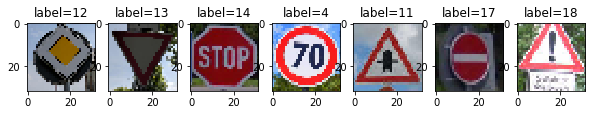

In [70]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import glob
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
# Visualizations will be shown in the notebook.
%matplotlib inline
file_name = '/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/new_image_label.txt'
labels = np.array([])
with open(file_name) as f:
    for line in f.readlines():
        for label in line.split():
             labels = np.append(labels, int(label))
        #Endfor
    #endfor
#endwith
n_image = len(labels)
image_dir_name = "/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/"
image_file_names=np.array([])
for i in range(len(labels)):
    image_file_names = np.append(image_file_names,image_dir_name+"image_{0}.jpg".format(i+1))
print(image_file_names)
print(len(image_file_names))

for i in range(n_image):
    image = Image.open(image_file_names[i])
    image = np.array(image.resize((32,32)))
    image = image.reshape(1,32,32,3).astype(np.uint8)
    print(image.shape)
    if i == 0:
        new_images = image
    else:
        new_images = np.concatenate((new_images,image),axis=0)
print(new_images.shape)
f,ax = plt.subplots(nrows=1,ncols=n_image,figsize=(10,10))
for i in range(n_image):
    print(type(ax))
    ax[i].imshow(new_images[i])
    ax[i].set_title("label={0}".format(int(labels[i])))
#endfor

### Predict the Sign Type for Each Image

In [71]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.


## data preprocess
### gray_ver ###
if is_rgb == 0:
    X_processed , y_processed = pre_process(new_images,labels)
#endif
################
### rgb_ver ###
else:
    X_processed , y_processed = pre_process_keep_rgb(new_images,labels)
#endif
###############
logits = self_difined_CNN_last_ver(x,keep_prob_1,keep_prob_2)
saver = tf.train.import_meta_graph('./self_difined_CNN_last_ver_is_rgb{0}.meta'.format(is_rgb))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    
    logits= sess.run(logits,feed_dict={x:X_processed,keep_prob_1:0.8,keep_prob_2:0.5})
    print(logits)
    predict_result = np.argmax(logits,axis=1)
    print(predict_result)
    answer = y_processed
    print(y_processed)
    A = (predict_result==answer)
    print(A)

INFO:tensorflow:Restoring parameters from ./self_difined_CNN_last_ver_is_rgb0
[[ 1.5048380e+00 -2.5584273e+00  1.0512881e+00 -6.9652998e-01
   1.4465178e+00  2.7787979e+00  3.2701523e+00 -1.4867637e+00
   1.6402659e+00  4.1769710e+00 -1.2792999e-01  2.6823401e-01
  -1.8186080e-01 -6.6121778e+00 -1.7556608e+00  9.7557843e-02
   2.7031698e+00 -2.2892966e+00 -1.1492157e+00 -2.6432520e-01
   1.5615058e-01 -3.0852876e+00 -2.1032801e+00 -2.0892262e+00
   5.6687040e+00  3.3441560e+00 -4.0142117e+00  1.9584630e+00
   2.6326866e+00  1.8640189e+00  3.0202000e+00 -3.0584328e+00
  -8.7136012e-01  3.2927718e+00  6.1833757e-01 -5.0117421e-01
  -3.0583436e+00 -6.7540628e-01  1.2242074e+00  5.2940130e+00
  -1.0195330e+00 -2.8599558e+00 -1.5382020e+00]
 [ 3.1469970e+00 -2.2107318e-01 -1.8620294e-01 -6.6436934e-01
  -5.0835431e-01  1.2118685e+00  6.6086549e-01  1.8212453e-01
   8.6876565e-01 -1.5003455e-01  4.6901715e-01  1.1450680e+00
  -1.4016277e+00 -1.0004203e+00  4.4562304e-01  5.2488589e-01
   1.8

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")